# *Saad Dahlab University (Blida 1)*
## *Computer Science Department*
## *Master 1 of Intelligent System Engineering*

# *Machine learning and Neural networks*

# *<span style="color:black"> Mini Project-1 : Sentiment Analysis using Logistic Regression</span>*

### Team : Medjrab Feriel , Guettai Kamilya

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

Imports:

In [4]:
!pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/299.9 kB ? eta -:--:--
   ------- ------------------------------- 61.4/299.9 kB 656.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/299.9 kB 819.2 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/299.9 kB 983.0 kB/s eta 0:00:01
   ---------------------------- ----------- 215.0/299.9 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.1 MB/s eta 0:00:00


In [5]:
!pip install category_encoders==2.*

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import warnings
from bs4 import MarkupResemblesLocatorWarning
warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)


In [49]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
df = pd.read_csv('IMDB Dataset.csv')

In [118]:
print(df.head())

                                              review sentiment  length  \
0  One of the other reviewers has mentioned that ...  positive    1761   
1  A wonderful little production. <br /><br />The...  positive     998   
2  I thought this was a wonderful way to spend ti...  positive     926   
3  Basically there's a family where a little boy ...  negative     748   
4  Petter Mattei's "Love in the Time of Money" is...  positive    1317   

                                        clean_review  word_count  
0  [one, reviewers, mentioned, watching, oz, epis...         162  
1  [wonderful, little, production, filming, techn...          86  
2  [thought, wonderful, way, spend, time, hot, su...          84  
3  [basically, family, little, boy, jake, thinks,...          64  
4  [petter, mattei, love, time, money, visually, ...         125  


In [117]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        50000 non-null  object
 1   sentiment     50000 non-null  object
 2   length        50000 non-null  int64 
 3   clean_review  50000 non-null  object
 4   word_count    50000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ MB
None


In [51]:
df.shape

(50000, 2)

In [52]:
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['review', 'sentiment'], dtype='object')


Data Cleaning and Exploration:

In [119]:
print("Missing values:\n", df.isnull().sum())
df = df.dropna()

Missing values:
 review          0
sentiment       0
length          0
clean_review    0
word_count      0
dtype: int64


In [129]:
df = df.applymap(lambda x: tuple(x) if isinstance(x, list) else x)
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()


C:\Users\Bsi\AppData\Local\Temp\ipykernel_10392\374105115.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: tuple(x) if isinstance(x, list) else x)


Duplicates: 0


In [130]:
#Distribution, 50% majority class baseline

df['sentiment'].value_counts(True)

sentiment
positive    0.501876
negative    0.498124
Name: proportion, dtype: float64

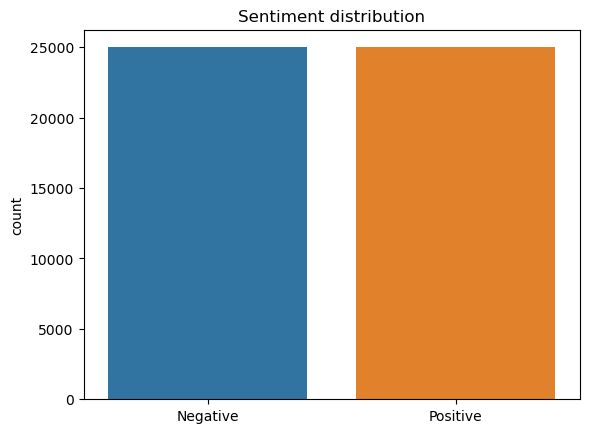

In [54]:
#Distribution bar plot

ax = sns.countplot(x = 'sentiment', data=df)
ax.set_title("Sentiment distribution")
ax.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("")
plt.show()

In [55]:
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [56]:
#Create a length column

df['length'] = df['review'].apply(len)
df.head(100)

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
95,Daniel Day-Lewis is the most versatile actor a...,positive,1565
96,My guess would be this was originally going to...,negative,1086
97,"Well, I like to watch bad horror B-Movies, cau...",negative,758
98,"This IS the worst movie I have ever seen, as w...",negative,993


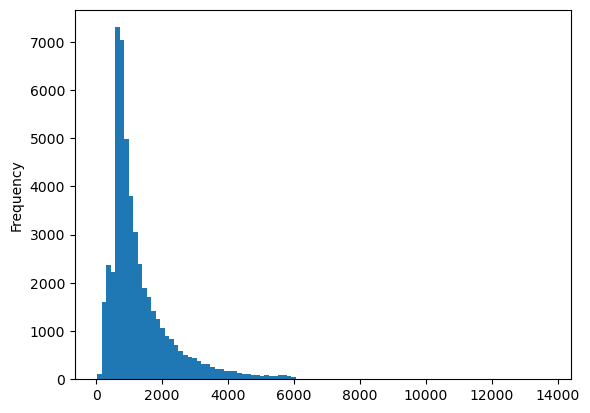

In [57]:
#Length histogram

df['length'].plot.hist(bins = 100)
plt.show()

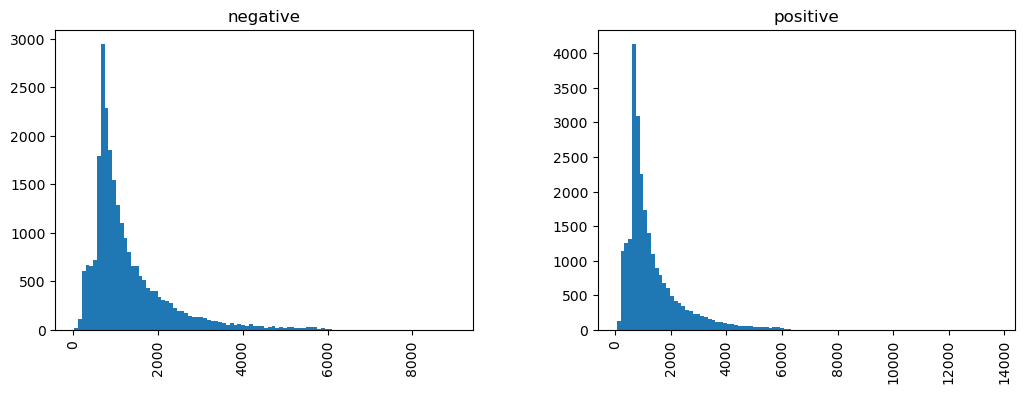

In [58]:
#length distribution by classes

df.hist(column='length', by='sentiment', bins=100, figsize=(12,4))
plt.show()

data preprocessing:

In [59]:
def clean_text(X):
  #remove HTML tags
  X = BeautifulSoup(X).get_text()

  #remove all non letters from text
  letters_only = re.sub("[^a-zA-Z]", " ", X) 

  #lower case, split words
  words = letters_only.lower().split()

  #stopwords variable
  stops = set(stopwords.words('english'))

  #Remove stop words and return
  return [w for w in words if not w in stops]

In [60]:
#clean dataframe
#create word count feature

df['clean_review'] = df['review'].apply(clean_text)
df['word_count'] = df['clean_review'].apply(len)
df.head()

,review,sentiment,length,clean_review,word_count
0,One of the other reviewers has mentioned that ...,positive,1761,"[one, reviewers, mentioned, watching, oz, epis...",162
1,A wonderful little production. <br /><br />The...,positive,998,"[wonderful, little, production, filming, techn...",86
2,I thought this was a wonderful way to spend ti...,positive,926,"[thought, wonderful, way, spend, time, hot, su...",84
3,Basically there's a family where a little boy ...,negative,748,"[basically, family, little, boy, jake, thinks,...",64
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,"[petter, mattei, love, time, money, visually, ...",125


In [61]:
#tokenize data

bow_transform = CountVectorizer(analyzer=clean_text).fit(df['review'])

In [62]:
#conversion to numerical format

print(bow_transform)


CountVectorizer(analyzer=<function clean_text at 0x0000029BAC0772E0>)


In [63]:
review_bow = bow_transform.transform(df['review'])

In [64]:
print(review_bow)

  (0, 581)	1
  (0, 1460)	1
  (0, 1570)	1
  (0, 3850)	1
  (0, 4452)	1
  (0, 4663)	1
  (0, 5353)	1
  (0, 5750)	2
  (0, 7499)	1
  (0, 8916)	1
  (0, 11552)	1
  (0, 12672)	1
  (0, 14166)	1
  (0, 14720)	1
  (0, 15584)	1
  (0, 16000)	2
  (0, 16153)	1
  (0, 16157)	1
  (0, 17252)	1
  (0, 20087)	1
  (0, 21220)	1
  (0, 21245)	1
  (0, 21564)	1
  (0, 21595)	1
  (0, 23257)	1
  :	:
  (49999, 59160)	3
  (49999, 59311)	1
  (49999, 60617)	1
  (49999, 61351)	1
  (49999, 63095)	1
  (49999, 67884)	1
  (49999, 73711)	1
  (49999, 73718)	1
  (49999, 77486)	1
  (49999, 77552)	1
  (49999, 77782)	1
  (49999, 78773)	2
  (49999, 83877)	1
  (49999, 84565)	1
  (49999, 91815)	1
  (49999, 92274)	1
  (49999, 94017)	1
  (49999, 97597)	1
  (49999, 97614)	1
  (49999, 97728)	1
  (49999, 98021)	1
  (49999, 99644)	1
  (49999, 99647)	2
  (49999, 99667)	1
  (49999, 100485)	1


In [67]:
print(bow_transform.get_feature_names_out()[471])  # Word at index 471 
print(bow_transform.get_feature_names_out()[26836])  # Word at index 26836 

accessability
easily


In [68]:
#Term frequency: how frequently a term is used / length
#IDF: Inverse Document Frequency, measures importance of the term
#rare words have more importance


tfidf_transformer = TfidfTransformer().fit(review_bow)
tfidf1 = tfidf_transformer.transform(review_bow)  #transform bow

In [70]:
#Split into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.22, random_state=42)

#length of train, test, and df
len(X_train), len(X_test), len(X_train) + len(X_test)

(39000, 11000, 50000)

In [71]:
X_train.head()

22070    Now, let me see if I have this correct, a luna...
45536    I saw this director's "Woman On The Beach" and...
15181    Mr Perlman gives a standout performance (as us...
4593     I knew five minutes after the monster made his...
47825    The Muppet movie is an instant classic. I reme...
Name: review, dtype: object

Predictive Models:

In [109]:
#Predicting & Stats Function
def pred(predicted,compare):
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    
    ##check accuracy of model
    print("Classification Report:")
    print('Accuracy : ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('False Negative Rate : ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate : ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

In [110]:
#Logistic Regression Model
#Model used for the app

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from bs4 import BeautifulSoup

pipeline = Pipeline([
                     ('bow', CountVectorizer(analyzer='word')),  # strings to token integer counts
                     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                     ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors
])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression(random_state=101))])

In [112]:
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

Classification Report:
Accuracy :  93.09

False Negative Rate :  6.28

False Postive Rate :  7.53

              precision    recall  f1-score   support

    negative       0.94      0.92      0.93     19565
    positive       0.93      0.94      0.93     19435

    accuracy                           0.93     39000
   macro avg       0.93      0.93      0.93     39000
weighted avg       0.93      0.93      0.93     39000



In [113]:
#Test set results
predictions = pipeline.predict(X_test)
pred(predictions,y_test)

Classification Report:
Accuracy :  90.01

False Negative Rate :  8.93

False Postive Rate :  11.08

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5435
    positive       0.89      0.91      0.90      5565

    accuracy                           0.90     11000
   macro avg       0.90      0.90      0.90     11000
weighted avg       0.90      0.90      0.90     11000



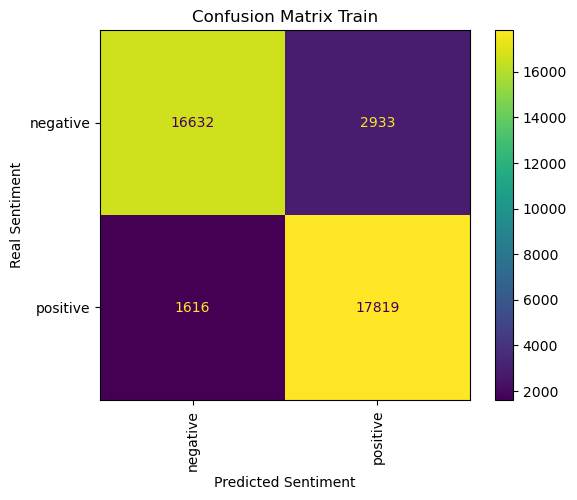

In [108]:
#Plot Confusion Matrix for train

from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion Matrix Train", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipeline, X_train, y_train, values_format='d', 
                                 xticks_rotation='vertical')
    disp.ax_.set_title(title)
    disp.ax_.set_ylabel("Real Sentiment") 
    disp.ax_.set_xlabel("Predicted Sentiment") 

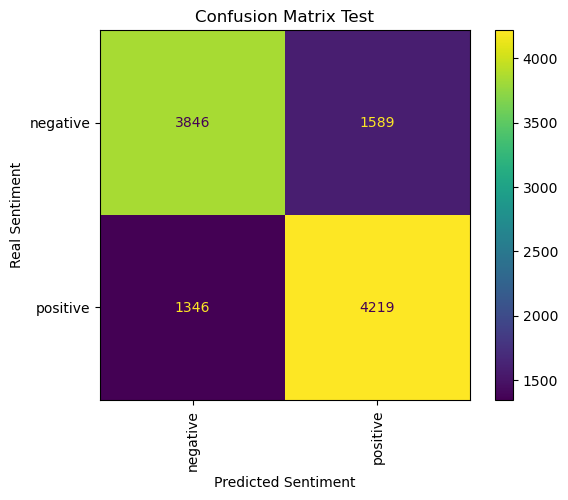

In [107]:
# Plot Confusion Matrix for test
titles_options = [("Confusion Matrix Test", None)]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, values_format='d', 
                                                xticks_rotation='vertical')
    disp.ax_.set_title(title) 
    disp.ax_.set_ylabel("Real Sentiment") 
    disp.ax_.set_xlabel("Predicted Sentiment") 

Hyperparameter Tuning:

In [133]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {'classifier__C': loguniform(0.01, 100)}
random_search = RandomizedSearchCV(
    pipeline_lr,
    param_dist,
    n_iter=10,  # Number of samples
    cv=5,
    scoring='accuracy',
    n_jobs=1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train, y_train)
print("Best C:", random_search.best_params_['classifier__C'])
print("Best Cross-Validation Accuracy:", random_search.best_score_)
predictions_best = random_search.best_estimator_.predict(X_test)
print("Classification Report for Tuned Logistic Regression (Test Set):")
pred(predictions_best, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................classifier__C=0.31489116479568624; total time=  27.1s
[CV] END ..................classifier__C=0.31489116479568624; total time=  26.6s
[CV] END ..................classifier__C=0.31489116479568624; total time=  25.5s
[CV] END ..................classifier__C=0.31489116479568624; total time=  26.1s
[CV] END ..................classifier__C=0.31489116479568624; total time=  25.6s
[CV] END ...................classifier__C=63.512210106407046; total time=  24.9s
[CV] END ...................classifier__C=63.512210106407046; total time=  26.2s
[CV] END ...................classifier__C=63.512210106407046; total time=  25.6s
[CV] END ...................classifier__C=63.512210106407046; total time=  25.6s
[CV] END ...................classifier__C=63.512210106407046; total time=  26.4s
[CV] END ....................classifier__C=8.471801418819979; total time=  25.4s
[CV] END ....................classifier__C=8.471

More Models:

In [103]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DecisionTreeClassifier(max_depth=40, min_samples_leaf=5, random_state=42)),  # train on TF-IDF vectors 
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

Classification Report:
Accuracy :  88.34

False Negative Rate :  8.31

False Postive Rate :  14.99

              precision    recall  f1-score   support

    negative       0.91      0.85      0.88     19565
    positive       0.86      0.92      0.89     19435

    accuracy                           0.88     39000
   macro avg       0.89      0.88      0.88     39000
weighted avg       0.89      0.88      0.88     39000



In [115]:
# KNN Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pipeline_knn = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])


pipeline_knn.fit(X_train, y_train)
predictions_knn_train = pipeline_knn.predict(X_train)
print("Classification Report for KNN (Training Set):")
pred(predictions_knn_train, y_train)


predictions_knn_test = pipeline_knn.predict(X_test)
print("\nClassification Report for KNN (Test Set):")
pred(predictions_knn_test, y_test)

Classification Report for KNN (Training Set):
Classification Report:
Accuracy :  88.37

False Negative Rate :  7.4

False Postive Rate :  15.82

              precision    recall  f1-score   support

    negative       0.92      0.84      0.88     19565
    positive       0.85      0.93      0.89     19435

    accuracy                           0.88     39000
   macro avg       0.89      0.88      0.88     39000
weighted avg       0.89      0.88      0.88     39000


Classification Report for KNN (Test Set):
Classification Report:
Accuracy :  77.37

False Negative Rate :  16.19

False Postive Rate :  29.22

              precision    recall  f1-score   support

    negative       0.81      0.71      0.76      5435
    positive       0.75      0.84      0.79      5565

    accuracy                           0.77     11000
   macro avg       0.78      0.77      0.77     11000
weighted avg       0.78      0.77      0.77     11000

